In [8]:
# Importieren der benötigten Bibliotheken

# Datenmanipulation
import pandas as pd
import numpy as np
import pickle

# Visualisierung
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hyperparameter-Optimierung
from skopt import BayesSearchCV
from skopt.space import Integer

# Modellagnostische Interpretation
#from pdpbox import pdp

# Warnings unterdrücken
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action="ignore", category=DataConversionWarning)
warnings.filterwarnings(action="ignore", category=FutureWarning)

# Eigene Module
from dpp.data import load_from_kaggle

# Model Interpretation


In [3]:
# Einlesen der Vorhersagen und Testdaten der Zielvariablen
target_test = pd.read_csv("../data/processed/target_test.csv")
target_pred_turb = pd.read_csv("../data/processed/target_pred_turb.csv")
target_pred_comp = pd.read_csv("../data/processed/target_pred_comp.csv")

In [4]:
# Ergebnisse für Kompressor-Modell
mae_comp = mean_absolute_error(target_test["GT_Compressor_decay_state_coefficient"], target_pred_comp)
mse_comp = mean_squared_error(target_test["GT_Compressor_decay_state_coefficient"], target_pred_comp)
rmse_comp = np.sqrt(mse_comp)
r2_comp = r2_score(target_test["GT_Compressor_decay_state_coefficient"], target_pred_comp)

print(f"Kompressor-Modell - MAE: {mae_comp:.4f}, MSE: {mse_comp:.4f}, RMSE: {rmse_comp:.4f}, R²: {r2_comp:.4f}")

Kompressor-Modell - MAE: 0.0000, MSE: 0.0000, RMSE: 0.0000, R²: 1.0000


In [5]:
# Ergebnisse für Turbinen-Modell
mae_turb = mean_absolute_error(target_test["GT_Turbine_decay_state_coefficient"], target_pred_turb)
mse_turb = mean_squared_error(target_test["GT_Turbine_decay_state_coefficient"], target_pred_turb)
rmse_turb = np.sqrt(mse_turb)
r2_turb = r2_score(target_test["GT_Turbine_decay_state_coefficient"], target_pred_turb)

print(f"Turbinen-Modell - MAE: {mae_turb:.4f}, MSE: {mse_turb:.4f}, RMSE: {rmse_turb:.4f}, R²: {r2_turb:.4f}")

Turbinen-Modell - MAE: 0.0003, MSE: 0.0000, RMSE: 0.0006, R²: 0.9941


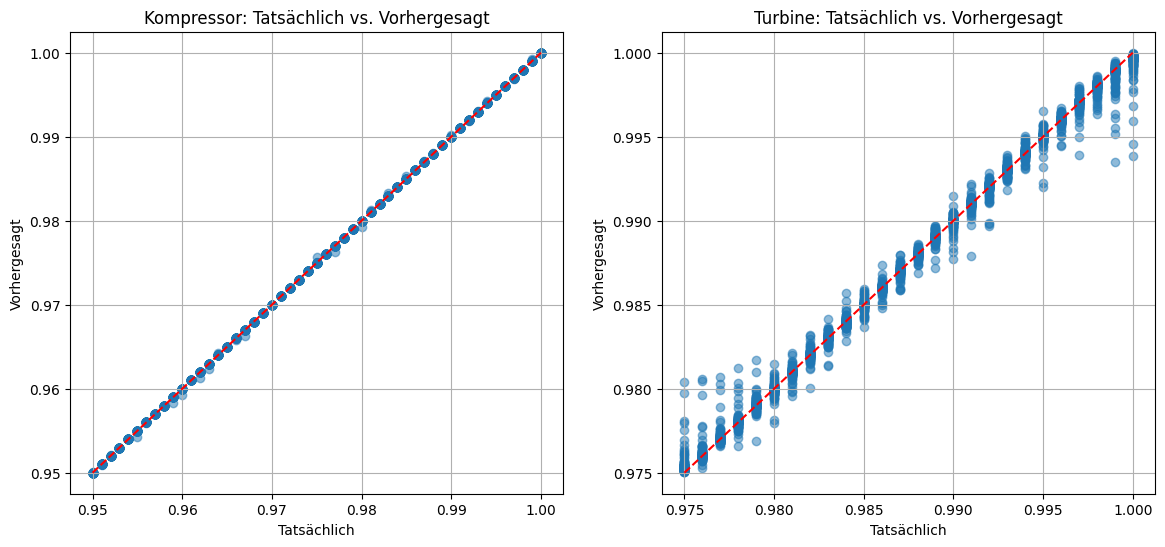

In [7]:
# Visualisieren
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Kompressor
axes[0].scatter(target_test["GT_Compressor_decay_state_coefficient"], target_pred_comp, alpha=0.5)
axes[0].plot([target_test["GT_Compressor_decay_state_coefficient"].min(), target_test["GT_Compressor_decay_state_coefficient"].max()], [target_test["GT_Compressor_decay_state_coefficient"].min(), target_test["GT_Compressor_decay_state_coefficient"].max()], 'r--')
axes[0].set_title("Kompressor: Tatsächlich vs. Vorhergesagt") 
axes[0].set_xlabel("Tatsächlich")
axes[0].set_ylabel("Vorhergesagt")
axes[0].grid(True)

# Turbine
axes[1].scatter(target_test["GT_Turbine_decay_state_coefficient"], target_pred_turb, alpha=0.5)
axes[1].plot([target_test["GT_Turbine_decay_state_coefficient"].min(), target_test["GT_Turbine_decay_state_coefficient"].max()], [target_test["GT_Turbine_decay_state_coefficient"].min(), target_test["GT_Turbine_decay_state_coefficient"].max()], 'r--')
axes[1].set_title("Turbine: Tatsächlich vs. Vorhergesagt")
axes[1].set_xlabel("Tatsächlich") 
axes[1].set_ylabel("Vorhergesagt")
axes[1].grid(True)

**Feature Importance**


In [9]:
# Laden der Modelle und Feature-Namen
model_comp =pickle.load(open("../data/processed/model_comp.pkl", "rb"))
model_turb =pickle.load(open("../data/processed/model_turb.pkl", "rb"))

feature_names = pd.read_csv("../data/processed/features_train.csv").columns

In [10]:
# Erstellen von DataFrames für die Feature-Wichtigkeiten
feature_importance_comp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": model_comp.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance_turb = pd.DataFrame({
    "Feature": feature_names,
    "Importance": model_turb.feature_importances_
}).sort_values(by="Importance", ascending=False)

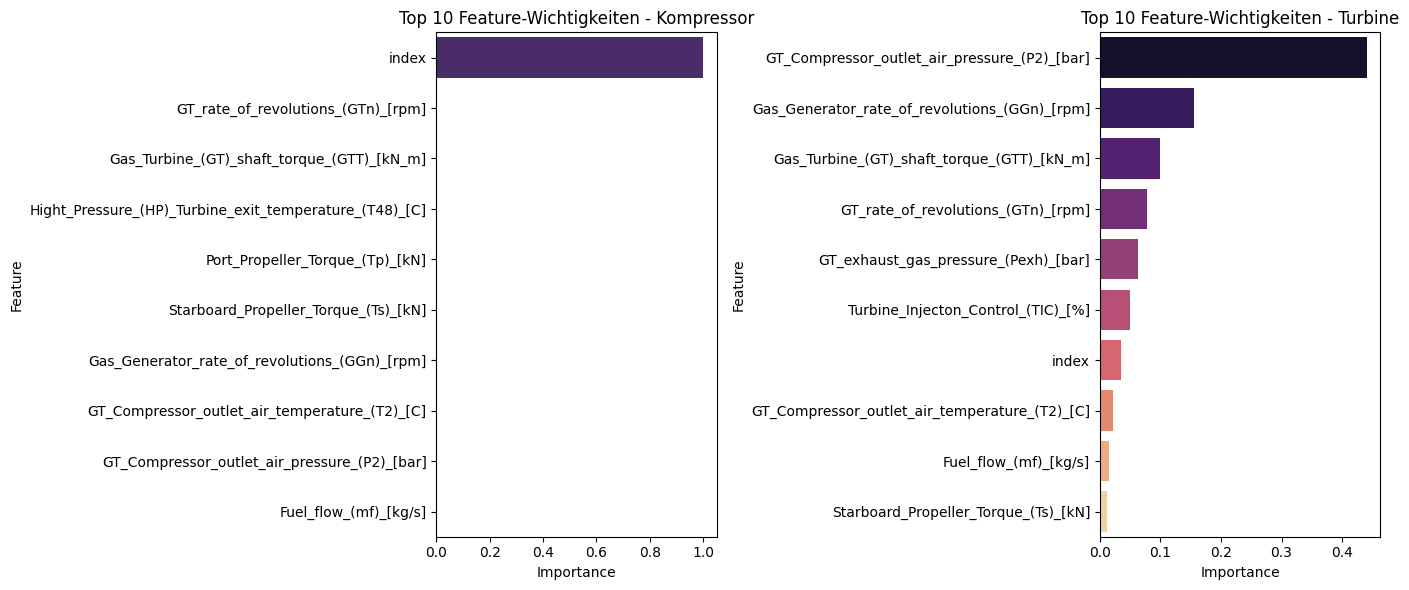

In [11]:
# Visualisierung
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_comp.head(10), ax=axes[0], palette="viridis")
axes[0].set_title("Top 10 Feature-Wichtigkeiten - Kompressor")

sns.barplot(x="Importance", y="Feature", data=feature_importance_turb.head(10), ax=axes[1], palette="magma")
axes[1].set_title("Top 10 Feature-Wichtigkeiten - Turbine")

plt.tight_layout()
plt.show()

**Data Imputation**


**Deal with Outliers**